# Linear regression 


In [13]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from torch.autograd import Variable

In [14]:
#Hyper Parameters
input_size = 1
output_size = 1
num_epochs = 1000
learning_rate = 0.001


#Dataset
x_train = torch.rand(30, input_size).type(torch.FloatTensor)
y_train = torch.rand(30, output_size).type(torch.FloatTensor)


#linear regression model. Inherits nn.Module
class LinearRegression(nn.Module):
    def __init__(self, input_size, output_size):
        #nn.Module.__init__(self)
        super(LinearRegression, self).__init__()
        #linear layer: applies a linear transformation to incoming data
        self.linear = nn.Linear(input_size, output_size) 
        
    #defines the computation performed at every call
    def forward(self, x):
        #apply linear transformation
        out = self.linear(x)
        return out


In [15]:
model = LinearRegression(input_size, output_size)

#Loss and Optimizer
#creates a criterion that measures the mean squared error 
#between n elements in the input x and target y
criterion = nn.MSELoss()
#optimizer, Stochastic Gradient Descent
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [17]:
#Train
for epoch in range(num_epochs):
    inputs = x_train
    targets = y_train
    
    #Forward + Backward + Optimize
    
    #clears the gradients of all optimized torch.Tensors 
    optimizer.zero_grad()
    #applies linear transformation (a call to model.forward(inputs) )
    output = model(inputs)
    #calculates RMS error between targets and output
    loss = criterion(output, targets)
    #accumulates the gradient for each parameter
    loss.backward()
    #updates parameters based on current gradients
    optimizer.step()
    
    if (epoch + 1) % 100 == 0:
        print ('Epoch [%d/%d], Loss: %.4f' %(epoch+1, num_epochs, loss.data[0])) 


C:\Users\Juanig\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Epoch [100/1000], Loss: 0.1282
Epoch [200/1000], Loss: 0.1276
Epoch [300/1000], Loss: 0.1271
Epoch [400/1000], Loss: 0.1267
Epoch [500/1000], Loss: 0.1262
Epoch [600/1000], Loss: 0.1257
Epoch [700/1000], Loss: 0.1253
Epoch [800/1000], Loss: 0.1248
Epoch [900/1000], Loss: 0.1244
Epoch [1000/1000], Loss: 0.1240


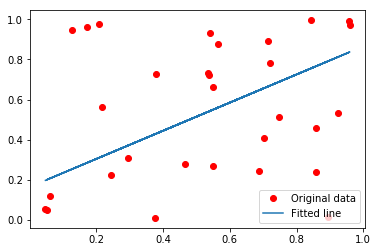

In [18]:
#Plot
predicted = model(x_train).data
plt.plot(x_train.numpy(), y_train.numpy(), 'ro', label='Original data')
plt.plot(x_train.numpy(), predicted.numpy(), label='Fitted line')
plt.legend()
plt.show()